In [ ]:
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", palette="pastel")

In [ ]:
df = pl.read_csv("at9852_1_chr3.w100bps.bed.depth",
                 n_threads = 8,
                 sep = '\t',
                 new_columns = ['chr', 'start', 'end', 'depth']
                ).lazy()
                 

In [ ]:
## Plot mean depth distribution

## Node Depth
____
- Number of times in which a node is crossed by all paths in the graph
- More node depth means the repeats in narrow region

In [14]:
df_region = (
    df
    .filter(
        (pl.col('start') > 17964487) & (pl.col('end') < 19990513)
    ).collect()
)

In [ ]:

df_region = (
    df
    .filter(
        (pl.col('start') > 0) & (pl.col('end') < 26000000)
    ).collect()
)


Text(0, 0.5, 'mean depth')

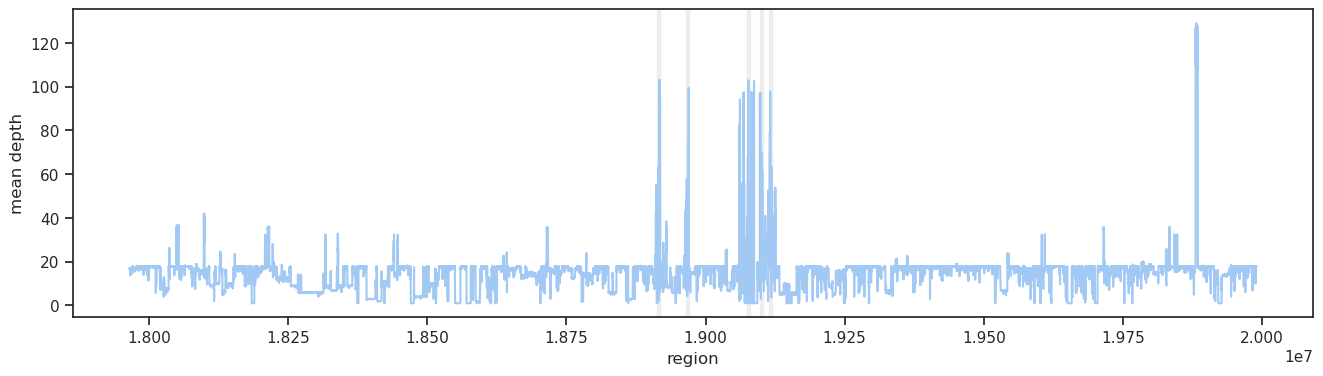

In [15]:
plt.subplots(figsize=(16,4))
x = df_region.select(pl.col('start'))
y = df_region.select(pl.col('depth'))
plt.plot(x,y)
plt.axvspan(xmin = 18913286, xmax = 18918586, color = 'gray', alpha = 0.1) #
plt.axvspan(xmin=18964487, xmax = 18970513, color='gray', alpha =0.1) #RPP1
plt.axvspan(xmin=19075083, xmax = 19079561, color='gray', alpha =0.1) #DM1
plt.axvspan(xmin=19097348, xmax = 19102417, color = 'gray', alpha = 0.1) # non-liftoff (with pfam domains)
plt.axvspan(xmin=19114555, xmax = 19118976, color = 'gray', alpha = 0.1) #DM2h
plt.xlabel("region")
plt.ylabel("mean depth")

|Figure|
|:---:|
|**The plot above shows complexity (mean depth of the node higher than the neighboring region) in the RPP1 neighborhood**|
|(highlighted portion is AT3G44480)|

One can see that the LRR containing RPPs and DMs in the RPP1 cluster have high mean depth because the repeat sequences (as nodes) are traversed again and again.
______
______

## Node Depth of Cleaned Graph 

In [ ]:
df = pl.read_csv("at9852_1_chr3.w100bps.bed.depth",
                 n_threads = 8,
                 sep = '\t',
                 new_columns = ['chr', 'start', 'end', 'depth']
                ).lazy()

In [ ]:
df_region = (
    df
    .filter(
        (pl.col('start') > 0) & (pl.col('end') < 26000000)
    ).collect()
)

plt.subplots(figsize=(16,4))
x = df_region.select(pl.col('start'))
y = df_region.select(pl.col('depth'))
plt.plot(x,y)
plt.axvspan(xmin = 18913286, xmax = 18918586, color = 'gray', alpha = 0.1) #
plt.axvspan(xmin=18964487, xmax = 18970513, color='gray', alpha =0.1) #RPP1
plt.axvspan(xmin=19075083, xmax = 19079561, color='gray', alpha =0.1) #DM1
plt.axvspan(xmin=19097348, xmax = 19102417, color = 'gray', alpha = 0.1) # non-liftoff (with pfam domains)
plt.axvspan(xmin=19114555, xmax = 19118976, color = 'gray', alpha = 0.1) #DM2h
plt.xlabel("region")
plt.ylabel("mean depth")

# Focus on selected loci by extracting subgraphs

In [ ]:
##get the names of the path
odgi paths \



In [16]:

pldf=pl.read_csv("at9852.w1k.depth.bed.gz",
                 n_threads=8, 
                 sep="\t", 
                 new_columns=['chr', 'start', 'stop', 'depth']
                )

In [43]:
chrValues=(pldf.select(['chr']).unique())

In [50]:
print(chrValues)

shape: (18, 1)
┌──────────────────────────┐
│ chr                      │
│ ---                      │
│ str                      │
╞══════════════════════════╡
│ at6137_1_chr3:1-26194750 │
│ at6923_1_chr3:1-28738137 │
│ at6929_1_chr3:1-25712594 │
│ at7143_1_chr3:1-26044309 │
│ ...                      │
│ at9852_1_chr3:1-26358531 │
│ at9879_1_chr3:1-27173682 │
│ at9883_1_chr3:1-26028663 │
│ at9900_1_chr3:1-27314136 │
└──────────────────────────┘


In [69]:
pldfAt9852= pldf.filter(pl.col('chr')=="at9852_1_chr3:1-26358531")

## select nodes on at9852 in RPP13

In [72]:
pldfAt9852_RPP13 = pldfAt9852.filter((pl.col('start')>=19982000) & (pl.col('stop')< 19989000))

In [73]:
print(pldfAt9852_RPP13)

shape: (6, 4)
┌──────────────────────────┬──────────┬──────────┬────────┐
│ chr                      ┆ start    ┆ stop     ┆ depth  │
│ ---                      ┆ ---      ┆ ---      ┆ ---    │
│ str                      ┆ i64      ┆ i64      ┆ f64    │
╞══════════════════════════╪══════════╪══════════╪════════╡
│ at9852_1_chr3:1-26358531 ┆ 19982000 ┆ 19983000 ┆ 17.62  │
│ at9852_1_chr3:1-26358531 ┆ 19983000 ┆ 19984000 ┆ 14.858 │
│ at9852_1_chr3:1-26358531 ┆ 19984000 ┆ 19985000 ┆ 13.112 │
│ at9852_1_chr3:1-26358531 ┆ 19985000 ┆ 19986000 ┆ 17.605 │
│ at9852_1_chr3:1-26358531 ┆ 19986000 ┆ 19987000 ┆ 16.379 │
│ at9852_1_chr3:1-26358531 ┆ 19987000 ┆ 19988000 ┆ 17.462 │
└──────────────────────────┴──────────┴──────────┴────────┘


In [ ]:
pldf.select(pldf.col('chr')=="at9852"

In [9]:
pldf.agg(pl.col('depth').mean()).collect()

AttributeError: 'DataFrame' object has no attribute 'agg'

In [3]:
pldf.filter(pl.col('depth')).agg(pl.all().mean())

NameError: name 'pldf' is not defined

In [5]:
pldf.write_parquet('at9852.w1k.depth.bed.parquet')
pldf1= pl.read_parquet('at9852.w1k.depth.bed.parquet')

In [6]:
pldf1.head()

at6137_1_chr3:1-26194750,0,1000,5749.77
str,i64,i64,f64
"""at6137_1_chr3:...",1000,2000,3174.86
"""at6137_1_chr3:...",2000,3000,17.811
"""at6137_1_chr3:...",3000,4000,17.973
"""at6137_1_chr3:...",4000,5000,17.981
"""at6137_1_chr3:...",5000,6000,17.951


In [26]:
%%timeit
df = pd.read_csv("at9852.w1k.depth.bed.gz", 
                 names=["chr", "start", "stop", "depth"],
                 sep="\t")

537 ms ± 3.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
df.head()

,chr,start,stop,depth
0,at6137_1_chr3:1-26194750,0,1000,5749.770
1,at6137_1_chr3:1-26194750,1000,2000,3174.860
2,at6137_1_chr3:1-26194750,2000,3000,17.811
3,at6137_1_chr3:1-26194750,3000,4000,17.973
4,at6137_1_chr3:1-26194750,4000,5000,17.981


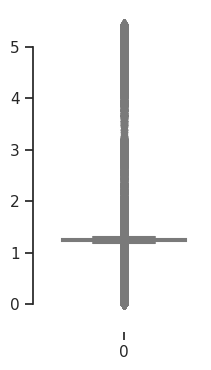

In [16]:
plt.figure(figsize=(2,4))
sns.boxplot(np.log10(pldf.select(['depth']),))
sns.despine(offset=10, trim=True)

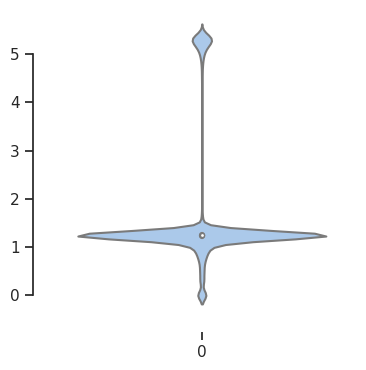

In [19]:

plt.figure(figsize=(4,4))
sns.violinplot(np.log10(pldf.select(['depth']),))
sns.despine(offset=10, trim=True)

In [41]:

def plotDepth(inputfile):
    '''
    bed file with depth information
    
    '''
    df = pd.read_csv(inputfile, 
                 names=["chr", "start", "stop", "depth"],
                 sep="\t")
    plt.figure(figsize=(4,4))
    sns.stripplot(df['depth'],color="k")
    sns.boxplot(df['depth'] ,palette='vlag')
    

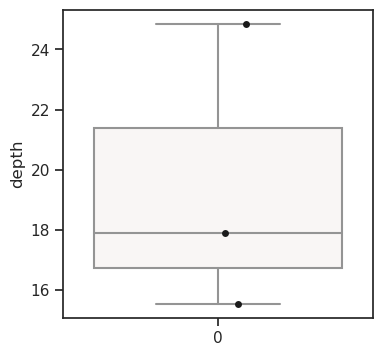

In [42]:
infile="RPP.bed.depth"
plotDepth(infile)

## Plotting PAVs in RPP1 1kb windows

In [2]:
pavDf = pl.scan_csv("RPP1.1kW.pavs.tsv", sep = "\t") 

In [3]:
pavDfSelect = (
    pavDf
    .select(
        [
            pl.col("start"),
            pl.col("end"),
            pl.col("group"),
            pl.col("pav"),
        ]
    ).collect()
)

In [5]:
pavDf_pd = pavDfSelect.to_pandas()

In [12]:
pavDf_pd.head()

,start,end,group,pav
0,18970487,18970513,at6137_1_chr3:1-26194750,1.0
1,18970487,18970513,at6923_1_chr3:1-28738137,1.0
2,18970487,18970513,at6929_1_chr3:1-25712594,1.0
3,18970487,18970513,at7143_1_chr3:1-26044309,1.0
4,18970487,18970513,at8285_1_chr3:1-26796854,1.0


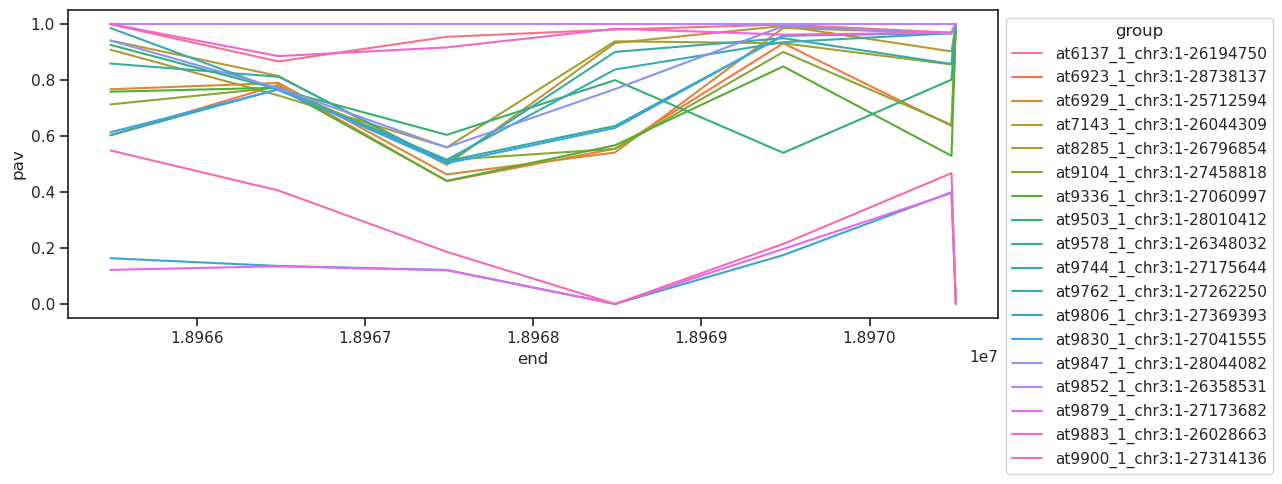

In [11]:
plt.subplots(figsize = (12,4))
ax = sns.lineplot(data = pavDf_pd, x = pavDf_pd['end'], y = pavDf_pd['pav'], hue = pavDf_pd['group'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## 